Loading data from MNIST

In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Assert the shapes
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualise

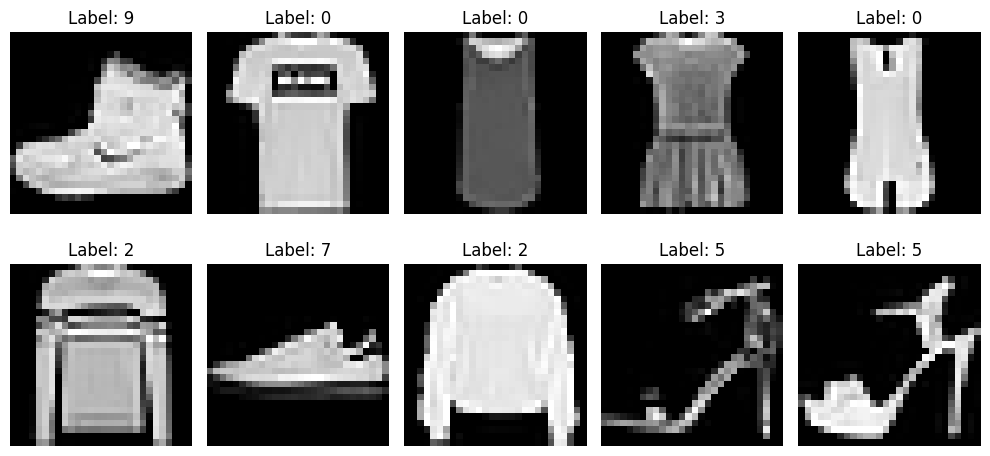

In [2]:
def plot_samples(x, y, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f'Label: {y[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples(x_train, y_train)


In [ ]:
#Normalise pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Model Building and Training

In [3]:
from keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.2, callbacks=[tensorboard_callback])


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6826 - loss: 6.5866 - val_accuracy: 0.7615 - val_loss: 0.7243
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7981 - loss: 0.6073 - val_accuracy: 0.8248 - val_loss: 0.5382
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8284 - loss: 0.4937 - val_accuracy: 0.8270 - val_loss: 0.4933
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8418 - loss: 0.4432 - val_accuracy: 0.8317 - val_loss: 0.4851
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8432 - loss: 0.4336 - val_accuracy: 0.8396 - val_loss: 0.4534
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8534 - loss: 0.4082 - val_accuracy: 0.8533 - val_loss: 0.4281
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8609 - loss: 0.3865 - val_accuracy: 0.8530 - val_loss: 0.4234
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8669 - loss: 0.3680 -

 Model Evaluation and Analysis

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8494 - loss: 0.4285
Test accuracy: 0.8484


In [9]:
model.save('fashion_mnist_model.h5')



Model Loading and Verification

In [10]:
from keras.models import load_model

loaded_model = load_model('fashion_mnist_model.h5')


In [11]:
loaded_model.summary()  # Display model architecture

# Check consistency in the number of parameters
original_params = model.count_params()
loaded_params = loaded_model.count_params()
print(f'Original model parameters: {original_params}, Loaded model parameters: {loaded_params}')
assert original_params == loaded_params


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Original model parameters: 109386, Loaded model parameters: 109386
